In [19]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# データインポート

In [9]:
train_df = pd.read_csv('titanic/train.csv')
test_df = pd.read_csv('titanic/test.csv')

# データを見る

In [18]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [68]:
print('train num: ', train_df.shape)
print('test num: ', test_df.shape)

train num:  (891, 12)
test num:  (418, 11)


### カラム
- PassengerId: 乗務員ID
- Survived: 生き延びたかどうか
- Pclass: Ticket Class, 1st, 2nd, 3rd, 1stが一番良いやつ？
- Name, Sex, Age: 名前, 性別, 年齢
- SibSp: タイタニック号に乗船した兄弟・配偶者の数
- Parch: タイタニック号に乗っている親/子供の数
- Ticket: チケット番号
- Fare: 運賃
- Cabin: 部屋番号
- Embarked: 乗船する港

## 度数分布

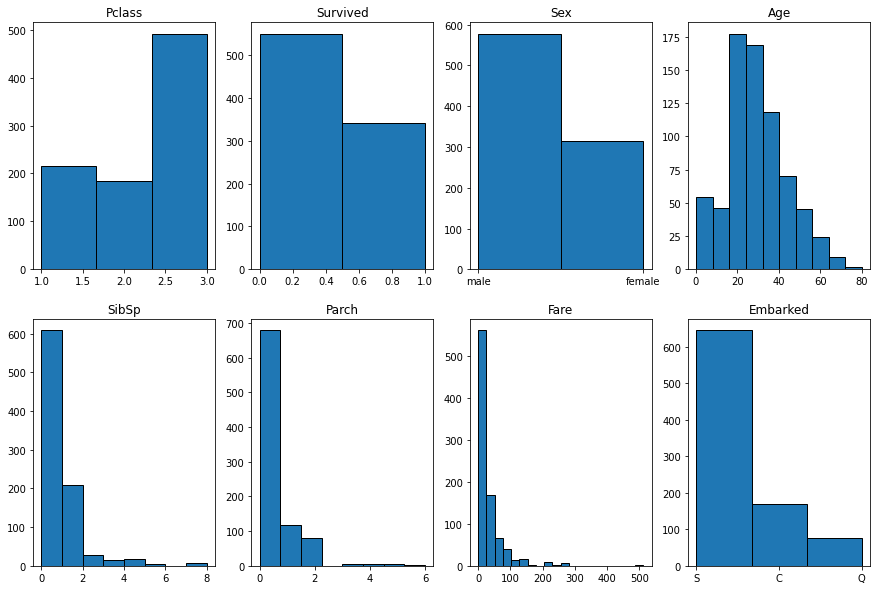

In [77]:
data = np.array(train_df['Pclass'])
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(2, 4, 1)
ax.hist(data, bins=3, histtype='barstacked', ec='black')
plt.title('Pclass')

data = np.array(train_df['Survived'])
ax = fig.add_subplot(2, 4, 2)
ax.hist(data, bins=2, histtype='barstacked', ec='black')
plt.title('Survived')

data = np.array(train_df['Sex'])
ax = fig.add_subplot(2, 4, 3)
ax.hist(data, bins=2, histtype='barstacked', ec='black')
plt.title('Sex')

data = np.array(train_df['Age'])
ax = fig.add_subplot(2, 4, 4)
ax.hist(data, bins=10, histtype='barstacked', ec='black')
plt.title('Age')

data = np.array(train_df['SibSp'])
ax = fig.add_subplot(2, 4, 5)
ax.hist(data, bins=8, histtype='barstacked', ec='black')
plt.title('SibSp')

data = np.array(train_df['Parch'])
ax = fig.add_subplot(2, 4, 6)
ax.hist(data, bins=8, histtype='barstacked', ec='black')
plt.title('Parch')

data = np.array(train_df['Fare'])
ax = fig.add_subplot(2, 4, 7)
ax.hist(data, bins=20, histtype='barstacked', ec='black')
plt.title('Fare')

data = np.array(train_df['Embarked'].dropna())
ax = fig.add_subplot(2, 4, 8)
ax.hist(data, bins=3, histtype='barstacked', ec='black')
plt.title('Embarked')

plt.show()

- Pclassは3rdが多い。
- 生き残ったのは4割程度
- 性別は男性が7割ほど。
- 年齢は20-30代が一番多い。
- 子供や親を連れてきた家族連れも2割程度いる。
- 配偶者や兄弟できている人も3割程度。
- 運賃は0-20が多く、ほとんどは格安運賃。
- 乗船する港はSかCかQでSが一番多い

# データを整形する

## Nullチェック

In [81]:
print("train", train_df.shape)
print('PassengerId: {}'.format(train_df['PassengerId'].isnull().sum()))
print('Survived: {}'.format(train_df['Survived'].isnull().sum()))
print('Pclass: {}'.format(train_df['Pclass'].isnull().sum()))
print('Name: {}'.format(train_df['Name'].isnull().sum()))
print('Sex: {}'.format(train_df['Sex'].isnull().sum()))
print('Age: {}'.format(train_df['Age'].isnull().sum()))
print('SibSp: {}'.format(train_df['SibSp'].isnull().sum()))
print('Parch: {}'.format(train_df['Parch'].isnull().sum()))
print('Ticket: {}'.format(train_df['Ticket'].isnull().sum()))
print('Fare: {}'.format(train_df['Fare'].isnull().sum()))
print('Cabin: {}'.format(train_df['Cabin'].isnull().sum()))
print('Embarked: {}'.format(train_df['Embarked'].isnull().sum()))

print("test: ", test_df.shape)
print('PassengerId: {}'.format(test_df['PassengerId'].isnull().sum()))
print('Pclass: {}'.format(test_df['Pclass'].isnull().sum()))
print('Name: {}'.format(test_df['Name'].isnull().sum()))
print('Sex: {}'.format(test_df['Sex'].isnull().sum()))
print('Age: {}'.format(test_df['Age'].isnull().sum()))
print('SibSp: {}'.format(test_df['SibSp'].isnull().sum()))
print('Parch: {}'.format(test_df['Parch'].isnull().sum()))
print('Ticket: {}'.format(test_df['Ticket'].isnull().sum()))
print('Fare: {}'.format(test_df['Fare'].isnull().sum()))
print('Cabin: {}'.format(test_df['Cabin'].isnull().sum()))
print('Embarked: {}'.format(test_df['Embarked'].isnull().sum()))

train (891, 12)
PassengerId: 0
Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 177
SibSp: 0
Parch: 0
Ticket: 0
Fare: 0
Cabin: 687
Embarked: 2
test:  (418, 11)
PassengerId: 0
Pclass: 0
Name: 0
Sex: 0
Age: 86
SibSp: 0
Parch: 0
Ticket: 0
Fare: 1
Cabin: 327
Embarked: 0


### データ整形の方向性

- CabinはほとんどがNanであり、結果に悪影響を及ぼす可能性があること、部屋番号はそれほど重要ではない？（要検討）ことからなくすのもあり。
- AgeはNanである部分を0として行うか、データが少なくなることを承知でNanのやつを削除するか。Nan, 0-10, 10-20, 20-30, 30-40, 40-50, 50-60, それ以上で分ける
- Nameも重要な要素ではない？と思われるので最初は考慮しない
- Sexはfemaleを0, maleを1とする
- チケット番号はそこまで重要な要素ではない？
- EmbarkedはSをカテゴリ変数として分割する
- Fareは0-20, 20-40, 40-60, 60-80, それ以上で4つのダミー変数とする
- 


In [103]:
def modify_data(data):
    modified_data = train_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
    modified_data = pd.concat([modified_data, pd.get_dummies(data['Embarked'])], axis=1).drop(columns='Embarked')
    modified_data = pd.concat([modified_data, pd.get_dummies(data['Sex'])], axis=1).drop(columns='Sex')
    modified_data = pd.concat([modified_data, pd.get_dummies(data['Pclass'])], axis=1).drop(columns='Pclass')
    modified_data = pd.concat([modified_data, pd.get_dummies(data['Parch'])], axis=1).drop(columns='Parch')
    modified_data = pd.concat([modified_data, pd.get_dummies(data['SibSp'])], axis=1).drop(columns='SibSp')
    modified_data = pd.concat([modified_data, pd.get_dummies(pd.cut(data['Age'], [0, 20, 40, 60, 80, 100]))], axis=1).drop(columns='Age')
    modified_data = pd.concat([modified_data, pd.get_dummies(pd.cut(data['Fare'], [0, 25, 50, 75, 100]))], axis=1).drop(columns='Fare')
    return modified_data

In [104]:
modified_train_data = modify_data(train_df)
modified_train_data

,Survived,C,Q,S,female,male,1,2,3,0,...,8,"(0, 20]","(20, 40]","(40, 60]","(60, 80]","(80, 100]","(0, 25]","(25, 50]","(50, 75]","(75, 100]"
0,0,0,0,1,0,1,0,0,1,1,...,0,0,1,0,0,0,1,0,0,0
1,1,1,0,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,1,1,0,0,0,1,1,...,0,0,1,0,0,0,1,0,0,0
3,1,0,0,1,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,1,0,1,0,0,1,1,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,1,0,1,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
887,1,0,0,1,1,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0
888,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
889,1,1,0,0,0,1,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0


### 入力とラベルで分ける